# "50 startups."/ "50 стартапов"

### _"Predict which companies to invest for maximizing profit" (Regression task)._
### _"Спрогнозируйте, в которые компании инвестировать для максимальной прибыли (Регрессионная задача)_"

## Table of Contents / Содержание


## Part 0: Introduction / Часть 0: Введение

#### Overview / Обзор
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

Набор данных, который мы видим здесь, содержит данные о 50 стартапах. Он имеет 7 колонок "ID", "Расходы на НИОКР", "Административные расходы", "Маркетинговые расходы", "Штат", "Категория", "Прибыль".

    
**Метаданные:**
    
* **ID** - startup ID / идентификатор стартапа

* **R&D Spend** - how much each startup spends on Research and Development / сколько каждый стартап тратит на исследования и разработки

* **Administration** - how much they spend on Administration cost / сколько они тратят на административные расходы

* **Marketing Spend** - how much they spend on Marketing /сколько они тратят на маркетинговые расходы

* **State** - which state the startup is based in / в каком штате базируется стартап

* **Category** - which business category the startup belong to / к какой бизнес-категории относится стартап

* **Profit** - the profit made by the startup / прибыль, полученная стартапом
   

#### Questions / Вопросы:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies) / Спрогнозируйте, в какие компании инвестировать для максимизации прибыли (выберите модель с лучшим результатом; создайте прогнозы; выберите компании)

## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
## Импорт, загрузка данных
* #### Import libraries, Read data from ‘.csv’ file / Импорт библиотек, чтение данных из '.csv' файла

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
## Исследовательский анализ данных
* #### Info, Head / Информация, заголовки
* #### Observation of target variable (describe + visualisation:distplot) / Наблюдение целевой переменной (описание + визуализация: distplot)
* #### Numerical and Categorical features / Числовые и категориальные характеристики
    * ##### List of Numerical and Categorical features /Список числовых и категориальных функций
* #### Missing Data / Недостающие данные
    * ##### List of data features with missing values / Список объектов данных с отсутствующими значениями  
    * ##### Filling missing values / Заполнение пропущенных значений
* #### Numerical and Categorical features / Числовые и категориальные характеристики    
    * ##### Visualisation  of Numerical and categorical features (regplot + barplot) / Визуализация числовых и категориальных признаков (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
## Обработка и преобразование данных
* #### One-Hot Encoding / Горячее кодирование
* #### Standard Scaler (optional) / Стандартный скалер (опционально)
* #### Creating datasets for ML part / Создание наборов данных для части ML
* #### 'Train\Test' splitting method / Метод разделения Train\Test

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
## Машинное обучение
* #### ML Models (Linear regression, Gradient Boosting Regression) / ML модели (линейная регрессия, регрессия градиентного бустинга)
* #### Build, train, evaluate and visualise models / Создание, обучение, оценивание и визуализация модели
* #### Creating final predictions with Test set / Создание окончательных прогнозов с помощью тестового набора
* #### Model comparison / Сравнение моделей


## [Conclusion](#Conclusion.)
## Выводы
* #### Submission of ‘.csv’ file with predictions / Отправка файла «.csv» с прогнозами

## Part 1: Import, Load Data.

* ### Import / Импорт

In [13]:
# import standard libraries / импорт стандартных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# import models and metrics / импорт моделей и метрик
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

* ### Load Data / Загрузка данных

In [14]:
# read data from '.csv' files / чтение данных из '.csv' файла
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# identify target / определяем таргет
target = train['Profit']

## Part 2: Exploratory Data Analysis.

* ### Info / Информация

In [15]:
# print the full summary of the Train dataset / печать полной сводки набора данных Train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [16]:
# print the full summary of the Test dataset / печать полной сводки набора данных Test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head / Заголовок

In [17]:
# preview of the first 5 lines of the loaded Train data / предварительный просмотр первых 5 строк загруженных данных Train
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [18]:
# preview of the first 5 lines of the loaded Test data / предварительный просмотр первых 5 строк загруженных данных Test
test.head()


,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable / Наблюдение целевой переменной

In [19]:
# target variable / целевая переменная
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

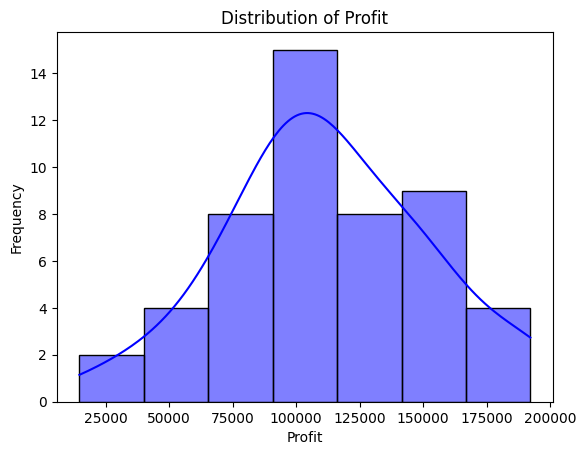

In [20]:
# visualisation of 'Profit' distribution / визуализация распределения прибыли
sns.histplot(train['Profit'], color='b', kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [21]:
# set 'ID' to index / установите 'ID' в индекс
train = train.set_index('ID')
test = test.set_index('ID')
train.head()

,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


* ### Numerical and Categorical features / Числовые и категориальные характеристики
#### List of Numerical and Categorical features / Список числовых и категориальных функций

In [22]:
# check for Numerical and Categorical features in Train / Проверка числовых и категориальных функций в Train
numerical_feats_train = train.select_dtypes(include=[np.number]).columns
print('Quantity of Numerical features / Количество числовых функций: ', len(numerical_feats_train))
print()
print(numerical_feats_train)
print()
categorical_feats_train = train.select_dtypes(include=[object]).columns
print ('Quantity of Categorical features / Количество категориальных функций: ', len(categorical_feats_train))
print()
print(categorical_feats_train)

Quantity of Numerical features / Количество числовых функций:  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Quantity of Categorical features / Количество категориальных функций:  2

Index(['State', 'Category'], dtype='object')


* ### Missing values / Недостающие данные

#### List of data features with missing values / Список объектов данных с отсутствующими значениями

In [23]:
# check the Train features with missing values / проверка характеристик Train с отсутствующими значениями
nan_columns_train = train.columns[train.isnull().any()]
print(train.isnull().sum())
print()
print('There are ' + str(len(nan_columns_train)) + " columns with NAN values for 50 rows.")
print('В 50 строках имеется ' + str(len(nan_columns_train)) + ' столбцов со значениями NAN')
nan_columns_train

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

There are 3 columns with NAN values for 50 rows.
В 50 строках имеется 3 столбцов со значениями NAN


Index(['R&D Spend', 'Marketing Spend', 'Category'], dtype='object')

In [24]:
# check the Test features with missing values / проверка характеристик Test с отсутствующими значениями
nan_columns = test.columns[test.isnull().any()]
print(test.isnull().sum())
print()
print("There are " + str(len(nan_columns)) + " columns with NAN values for 50 rows.")
nan_columns

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

There are 3 columns with NAN values for 50 rows.


Index(['R&D Spend', 'Administration', 'State'], dtype='object')

#### Filling missing values / Заполнение пропущенных значений

Fields where NAN values have meaning / Поля, в которых значения NAN имеют значение

Explaining in further depth / Подробное объяснение:

* 'R&D Spend': Numerical - replacement of NAN by 'mean' / «Расходы на НИОКР»: числовые значения — замена NAN на «среднее»;; 
* 'Administration': Numerical - replacement of NAN by 'mean' / «Администрирование»: Числовое значение — замена NAN на «среднее»;
* 'Marketing Spend': Numerical - replacement of NAN by 'mean' / «Маркетинговые расходы»: числовые значения — замена NAN на «среднее»;
* 'State': Categorical - replacement of NAN by 'None' / «Состояние»: Категория — замена NAN на «None»;
* 'Category': Categorical - replacement of NAN by 'None' / «Категория»: Категория — замена NAN на «None».

In [25]:
 # Numerical NAN columns to fill in Train and Test datasets / Числовые столбцы NAN для заполнения наборов данных Train и Test.
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# replace 'NAN' with 'mean' in these columns / замена в этих столбцах «NAN» на «mean»
train[nan_columns_fill] = train[nan_columns_fill].fillna(train[nan_columns_fill].mean())
test[nan_columns_fill] = test[nan_columns_fill].fillna(test[nan_columns_fill].mean())


# Categorical NAN columns to fill in Train and Test datasets / Категориальные столбцы NAN для заполнения наборов данных Train и Test.
na_columns_fill = [
    'State',
    'Category'
    ]

# replace 'NAN' with 'None' in these columns / замена «NAN» на «Нет» в этих столбцах
print('Missing values in Train:', train.isnull().sum().sum())
print('Missing values in Test:', test.isnull().sum().sum())

Missing values in Train: 1
Missing values in Test: 1


#### Visualisation  of Numerical features (regplot) / Визуализация числовых и категориальных признаков (regplot + barplot)

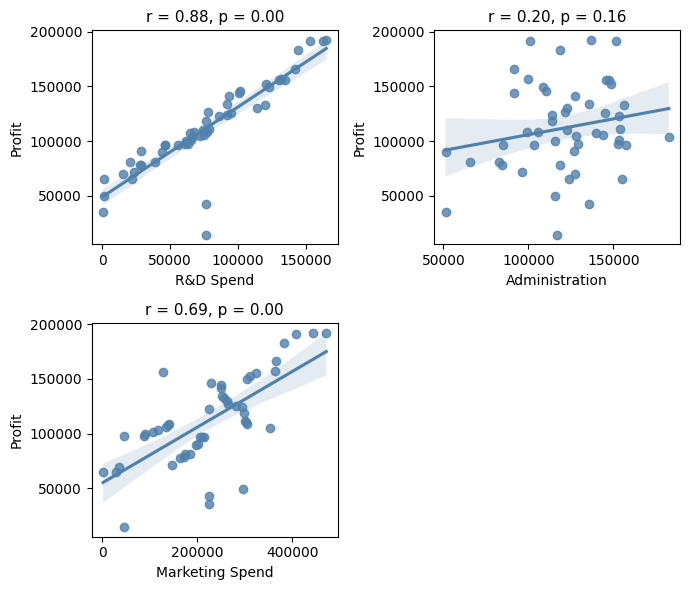

In [26]:
# numerical features visualisation / визуализация численных характеристик
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols * 3.5, nr_rows * 3))

plot_num_feats = [c for c in numerical_feats_train if c not in ['ID', 'Profit']]

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r * nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(x=train[plot_num_feats[i]], y=train['Profit'], ax=axs[r, c], color="#5081ac")
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
            str_title = f"r = {stp[0]:.2f}, p = {stp[1]:.2f}"
            axs[r, c].set_title(str_title, fontsize=11)
        else:
            axs[r, c].set_visible(False)  # Скрыть пустую ось

plt.tight_layout()
plt.show()

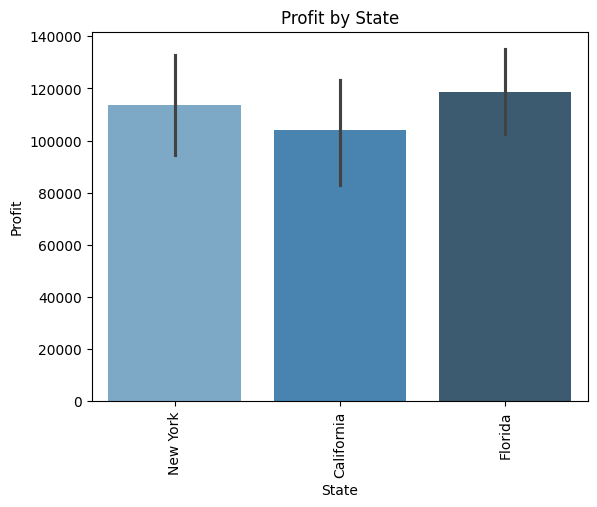

In [27]:
# categorical features visualisation / визуализация категориальных характеристик
# 'Profit' split in 'State' level / Разделение «прибыли» на уровне «штат»
sns.barplot(x='State', y='Profit', data=train, palette="Blues_d", hue='State', legend=False)
plt.xticks(rotation=90)
plt.title('Profit by State')
plt.show()

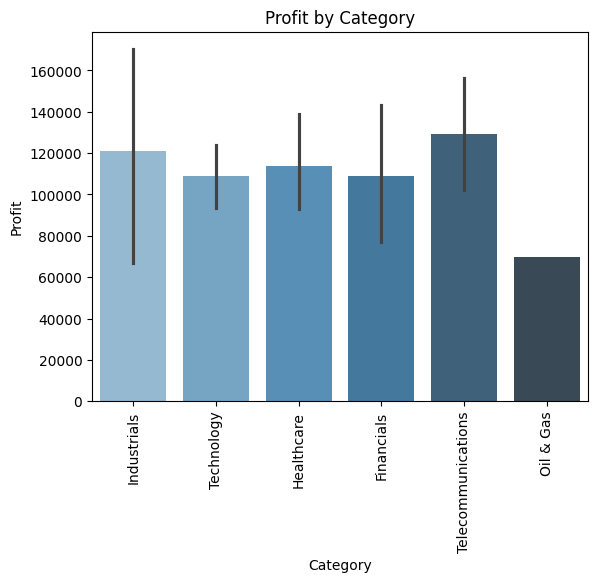

In [28]:
# categorical features visualisation / визуализация категориальных характеристик
# 'Profit' split in 'Category' level / разделение «прибыли» на уровне «категория»
sns.barplot(x='Category', y='Profit', data=train, palette='Blues_d', hue='Category', legend=False)
plt.xticks(rotation=90)
plt.title('Profit by Category')
plt.show()

## Part 3: Data Wrangling and Transformation.
## Часть 3: Обработка и преобразование данных

* ### One-Hot Encoding / Горячее кодирование

In [29]:
# One-Hot Encoding Train dataset / Набор данных One-Hot Encoding Train
train = pd.get_dummies(train,columns=['State', 'Category'])

# Drop target variable / Удаление главной переменной
train = train.drop(columns=['Profit'])

In [30]:
# preview of the first 5 lines of the loaded Train data / предварительный просмотр первых 5 строк загруженных Train данных
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,False,False,True,False,False,True,False,False,False
1,162597.70,151377.59,443898.53,True,False,False,False,False,False,False,True,False
2,153441.51,101145.55,407934.54,False,True,False,False,True,False,False,False,False
3,144372.41,118671.85,383199.62,False,False,True,True,False,False,False,False,False
4,142107.34,91391.77,366168.42,False,True,False,False,False,True,False,False,False


In [31]:
# Train data shape / Форма данных Train
train.shape

(50, 12)

In [32]:
# One Hot-Encoding Test dataset / Один набор данных теста горячего кодирования
test = pd.get_dummies(test,columns=['State', 'Category'])

In [33]:
# preview of the first 5 lines of the loaded Test data / предварительный просмотр первых 5 строк загруженных тестовых данных
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,False,False,True,False,False,True,False,False,False
1,162597.70,151377.59,443898.53,True,False,False,False,False,False,False,True,False
2,153441.51,101145.55,407934.54,False,True,False,False,True,False,False,False,False
3,144372.41,118671.85,383199.62,False,False,True,True,False,False,False,False,False
4,142107.34,91391.77,366168.42,False,True,False,False,False,True,False,False,False


In [34]:
# Test data shape / Форма тестовых данных
test.shape

(50, 12)

In [35]:
# Drop unnecessary variables / Удаление ненужных переменных
train = train.drop(columns=['Category_None'], errors='ignore')
test = test.drop(columns=['State_None'], errors='ignore')

* ### StandardScaler / Стандартный скалер

In [36]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc_train = sc.fit_transform(train)
#sc_test = sc.transform(test)

#sc_train = pd.DataFrame(sc_train)
#sc_train.head()

#sc_test = pd.DataFrame(sc_test)
#sc_test.head()

* ### Creating datasets for ML part / Создание наборов данных для ML части

In [37]:
# set 'X' for features of scaled Train dataset 'sc_train' / установка «X» для функций масштабированного набора данных Train «sc_train».
#X = sc_train

# set 'y' for the target 'Profit' / установка «y» для атрибута «Прибыль»
#y = target

# 'X_Test' for features of scaled Test dataset 'sc_test' / «X_Test» для функций масштабированного набора тестовых данных «sc_test».
#X_Test = sc_test

# set 'X' for features of scaled Train dataset 'sc_train'
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = test

* ### 'Train\Test' split / Разделение «Train\Test»

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [40]:
X_train.shape

(35, 12)

In [41]:
X_test.shape

(15, 12)

## Part 4: Machine Learning. 
## Часть 4: Машинное обучение.

* ### Build, train, evaluate and visualise models / Создание, обучение, оценка и визуализация модели

* #### Linear Regression / Линейная регрессия

In [42]:
# Linear Regression model / Модель линейной регрессии
LR = LinearRegression()

# Model Training / Тренировочная модель
LR.fit(X_train,y_train)

# Model Prediction / Модельное предсказание
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [43]:
# Model R2 score / Оценка R2 для модели
LRscore = LR.score(X_test, y_test)

In [44]:
# Model Metrics / Модельные метрики
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                         'r2score':r2_score(y_test,LR_pred),
                         'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                         'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))
                         },index=[1])
LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


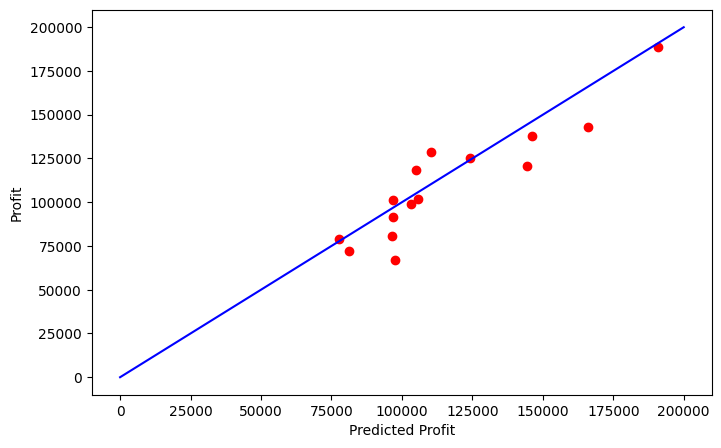

In [46]:
# visualisation of Train dataset predictions / визуализация прогнозов набора данных Train

# Plot outputs / Построение выходных данных
plt.figure(figsize=(8,5))
plt.plot(y_test, LR_pred, 'ro')
plt.plot([0,200000],[0,200000],'b-')
plt.xlabel('Predicted Profit')
plt.ylabel('Profit')
plt.show()

In [47]:
# Test final predictions / Тестирование окончательных прогнозов
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([173426.18101741, 189136.03555658, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [48]:
# Model Metrics / Модельные метрики
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y,LR_pred1),
                          'MAE': metrics.mean_absolute_error (y,LR_pred1),
                          'MSE': metrics.mean_squared_error(y,LR_pred1),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                          'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                          'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))
                          },index=[1])
LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


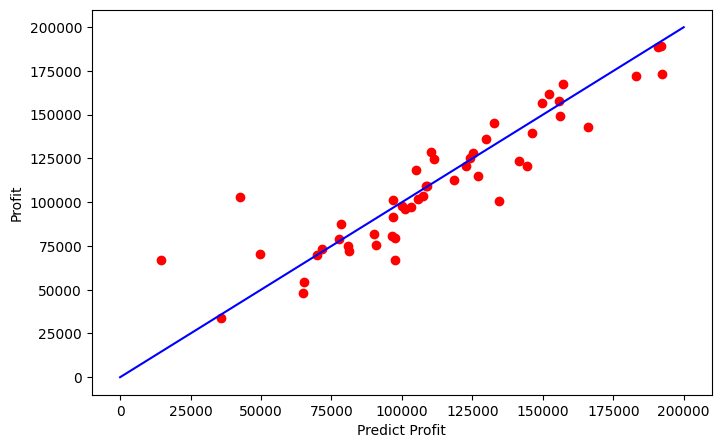

In [50]:
# visualisation of Test dataset predictions / визуализация прогнозов набора данных Test

# Plot outputs / Построение выходных данных
plt.figure(figsize=(8,5))
plt.plot(y, LR_pred1, 'ro')
plt.plot([0,200000],[0,200000],'-b')
plt.xlabel('Predict Profit')
plt.ylabel('Profit')
plt.show()

In [51]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset / сравнение фактической «прибыли» из набора данных Train и прогнозируемой «прибыли» из набора тестовых данных
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


* #### Gradient Boosting Regressor /Регрессор градиентного бустинга

In [52]:
# Gradient Boosting Regressor model / Модель регрессора градиентного бустинга
GB=GradientBoostingRegressor(random_state=0)

# Model Training / Тренировочная модель
GB.fit(X_train,y_train)

# Model Prediction / Модельное предсказание
GB_pred = GB.predict(X_test)

# Model R2 score / Оценка R2 для модели
GBscore = GB.score(X_test, y_test)

In [53]:
# Model Metrics / Модельные метрики
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.871975,8794.067752,1.235755e+08,11116.451707,0.015324,0.123789


In [54]:
# Test final predictions / Тестирование окончательных прогнозов
GB_pred1 = GB.predict(X_Test)

In [55]:
# Model Metrics / Модельные метрики
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


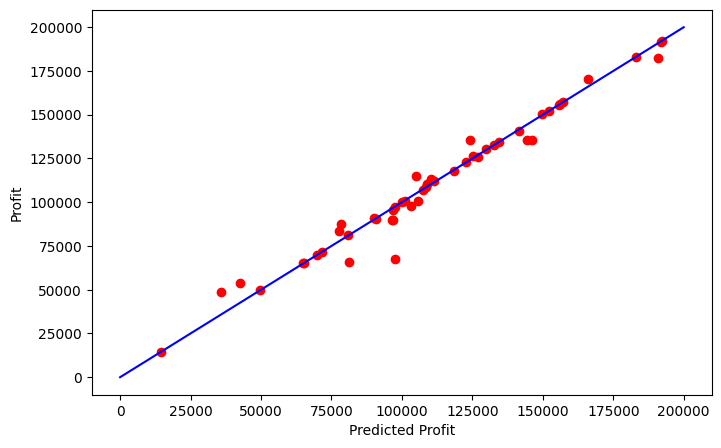

In [57]:
# visualisation of Test dataset predictions / визуализация прогнозов набора данных Test

# Plot outputs / Построение выходных данных
plt.figure(figsize=(8,5))
plt.plot(y, GB_pred1,'ro')
plt.plot([0,200000],[0,200000], 'b-')
plt.xlabel('Predicted Profit')
plt.ylabel('Profit')
plt.show()

### Model comparison / Сравнение моделей

In [58]:
# score comparison of models / сравнение оценок моделей
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [59]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset / сравнение фактической «прибыли» из набора данных Train и прогнозируемой «прибыли» из набора тестовых данных
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,173426.181017,191867.624129
1,191792.060000,189136.035557,191631.052384
2,191050.390000,188946.035741,182312.330201
3,182901.990000,172036.552176,182851.070198
4,166187.940000,142782.308756,170184.031177
5,156991.120000,167404.746140,156991.181748
6,156122.510000,149507.668697,156065.183378
7,155752.600000,157587.392262,155657.315655
8,152211.770000,161999.462058,152090.773106
9,149759.960000,156553.515380,150395.829435


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

**Результат**: лучшей моделью является **Регрессор градиентного бустинга** с **оценкой R2 = 0,972002**.

##  Conclusion.

In [61]:
# submission of .csv file with final predictions / отправка файла .csv с окончательными прогнозами
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)